In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm

In [3]:
path = './라벨링데이터'
category_list = os.listdir(path)
print(category_list)

['글짓기', '대안제시', '설명글', '주장', '찬성반대']


In [4]:
for category in category_list:
    category_path = path + "/" + category
    for file_dir in os.listdir(category_path) :
        print(category_path + "/" +file_dir)

./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33982.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33985.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33986.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33988.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33989.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33990.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33991.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33992.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33993.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33994.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33995.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33996.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33998.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_33999.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34001.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34003.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34004.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34005.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34006.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34007.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34009.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34080.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34082.json
./라벨링데이터/글짓기/글짓기_고등_1학년_ESSAY_34085.json
./라벨링데이터/글짓기/글짓기

In [5]:
paragraph_txt_list = []
essay_type_list = []
student_grade_list = []
paragraph_scoreT_avg_list = []

#"paragraph_txt", "essay_type", "student_grade"
path = './라벨링데이터'
category_list = os.listdir(path)
for category in tqdm(category_list, total=len(category_list), ## 전체 진행수
              desc='Description', ## 진행률 앞쪽 출력 문장
              ncols=70, ## 진행률 출력 폭 조절
              ascii=' =', ## 바 모양, 첫 번째 문자는 공백이어야 작동
              leave=True): ## True 반복문 완료시 진행률 출력 남김. False 남기지 않음
    if category == ".DS_Store" : continue
    category_path = path + "/" + category
    for file_dir in os.listdir(category_path) :
        with open(category_path + "/" +file_dir, 'r', encoding='UTF8') as outfile:
            json_data = json.load(outfile)
            paragraph_scoreT_avg_list.append(json_data['score']['paragraph_score'][0]['paragraph_scoreT_avg'])
            paragraph_txt_list.append(json_data['paragraph'][0]['paragraph_txt'])
            essay_type_list.append(file_dir.split("_")[0])
            student_grade_list.append(file_dir.split("_")[1]+"_"+file_dir.split("_")[2])

Description: 100%|======================| 5/5 [07:11<00:00, 86.31s/it]


In [6]:
print(len(paragraph_scoreT_avg_list))

39591


In [7]:
df = pd.DataFrame({"paragraph_txt" : paragraph_txt_list, "essay_type" : essay_type_list, "student_grade" : student_grade_list, "paragraph_scoreT_avg" : paragraph_scoreT_avg_list})

In [8]:
def replace_uni(text): 
    return text.replace("\u3000"," ").replace("\u200b","").replace("\ufeff","").replace("\u2009","").replace("‘","").replace("’","").replace("<span>", "").replace("</span>", "").replace("#@문장구분#", "").replace("&nbsp;", " ").replace("\u2019","").replace("&lt;","").replace("&gt;","").replace("amp;","").replace("#@","")

df['paragraph_txt'] = df['paragraph_txt'].apply(replace_uni)

In [9]:
df

,paragraph_txt,essay_type,student_grade,paragraph_scoreT_avg
0,익숙함에 속아 소중함을 잊지말자라는 명언은 매우 유명한 명언이다. 난 이 명언의 내...,글짓기,고등_1학년,2.555555
1,소중함이란 가치를 따질 수 없을 만큼 매우 귀중한 것을 말합니다. 저에게도 이러한 ...,글짓기,고등_1학년,2.444444
2,"""익숙함에 속아 소중함을 잊지 말자"" 모든 사람들이 아는 말이다. 그만큼 모두가 그...",글짓기,고등_1학년,2.611111
3,나는 가까운 사람에 대한 소중함에 대하여 알지 못했다. 그 일이 있기 전까지 말이다...,글짓기,고등_1학년,2.777778
4,나는 태어났을 때부터 할머니와 함께 살아왔는데 할머니는 하루도 빠짐없이 나에게 아침...,글짓기,고등_1학년,3.000000
...,...,...,...,...
39586,평소에 에너지 절약에 대한 표어를 자주 보긴합니다만 개인적으로 많이 신경쓰고 있지는...,찬성반대,초등_6학년,2.666667
39587,저는 아무래도 지금의 생활을 줄인다고 하면 힘들 것 같습니다. 지금 우리가 사용하고...,찬성반대,초등_6학년,2.833333
39588,에너지를 절약할수록 불편하고 소모할수록 편하다면 누구나 나갈 때 에어컨을 켜놓고 외...,찬성반대,초등_6학년,2.666667
39589,우리가 지금 사용하고 있는 전기와 석유유등 사용할 수 있는 자원은 매우 한정적입니...,찬성반대,초등_6학년,2.666667


<Axes: xlabel='paragraph_scoreT_avg', ylabel='count'>

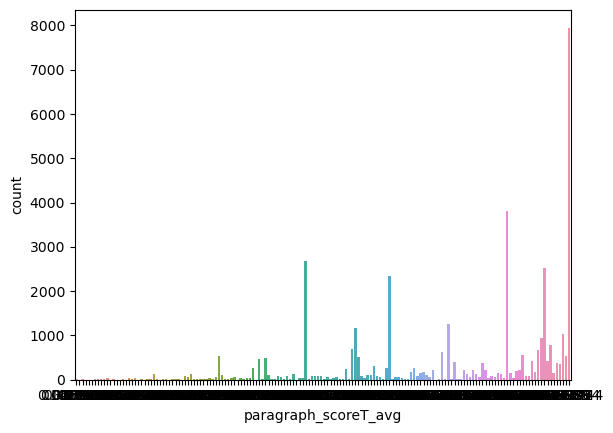

In [10]:
sns.countplot(x=df['paragraph_scoreT_avg'])

<AxesSubplot:xlabel='count', ylabel='paragraph_scoreT_avg'>

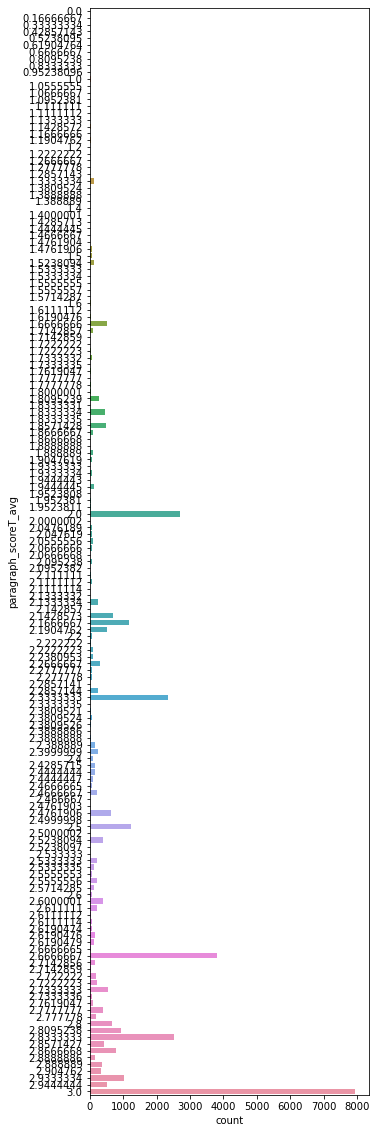

In [16]:
fig = plt.subplots(figsize=(5,20))
sns.countplot(y=df['paragraph_scoreT_avg'])

In [17]:
df.paragraph_scoreT_avg.value_counts() #.keys()

paragraph_scoreT_avg
3.000000    7952
2.666667    3819
2.000000    2688
2.833333    2525
2.333333    2332
            ... 
1.200000       1
1.833333       1
1.055556       1
1.266667       1
0.166667       1
Name: count, Length: 160, dtype: int64

In [11]:
def give_grade(n) :
    if n == 3.0 :
        return 'A'
    elif n >= 2.75 :
        return 'B'
    elif n >= 2.333335 :
        return 'C'
    else :
        return 'D'

In [12]:
df["grade"] = df["paragraph_scoreT_avg"].apply(give_grade)

In [13]:
df.grade.value_counts()

D    12582
C    10632
B     8425
A     7952
Name: grade, dtype: int64

In [14]:
df.to_csv("./에세이데이터1.csv", index = False, encoding = 'utf-8-sig')